# JOIN

- SQL 조인은 **두 개 혹은 그 이상의 테이블들**을 공통 필드를 가지고 Merge하는데 사용된다. 이는 스타 스키마로 구성된 테이블들로 분산되어 있던 정보를 통합하는데 사용된다.

- 왼쪽 테이블을 LEFT라고 하고 오른쪽 테이블을 RIGHT이라고 하자. JOIN의 결과는 방식에 상관없이 양쪽의 필드를 모두 가진 새로운 테이블을 만들어내게 된다. 조인의 방식에 따라 다음 두 가지가 달라진다

>1. 어떤 레코드들이 선택되는지?
>2. 어떤 필드들이 채워지는지?


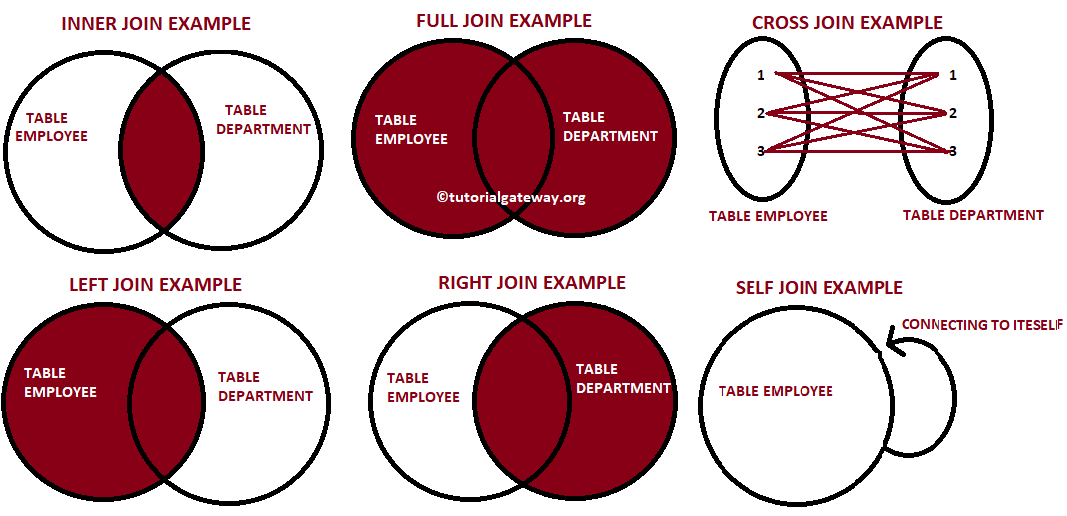

- INNER & LEFT JOIN을 많이 쓴다.
- `cross JOIN` : 
- `self JOIN`: 

## JOIN의 문법

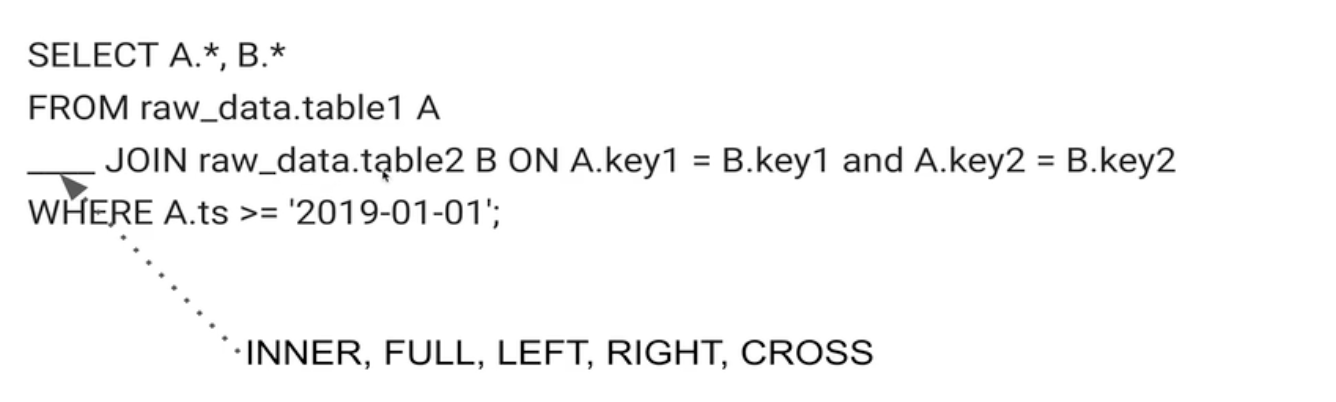


## JOIN시 고려해야할 점
- 먼저 중복 레코드가 없고 Primary Key의 uniqueness가 보장됨을 체크
    - 아주 중요함!!!
- 조인하는 테이블들간의 관계를 명확하게 정의
    - One to one
        - 완전한 one to one: user_session_channel & session_timestamp
        - 한쪽이 부분집합이 되는 one to one: user_session_channel & session_transaction One to many? (order vs order_items) : 이 때 Left!
    - One to Many?
        - 이 경우 중복이 더 큰 문제됨-> 증폭!!
    -  Many to one?
        - 방향만 바꾸면 One to many로 보는 것과 사실상 동일.
    - Many to many?
        - 이런 경우는 많지 않으며 이는 one to one이나 one to many로 바꾸는 것이 가능하다면 변환하여 조인하는 것이 덜 위험
- 어느 테이블을 베이스로 잡을지 (From에 사용할지) 결정해야함

# JOIN 실습

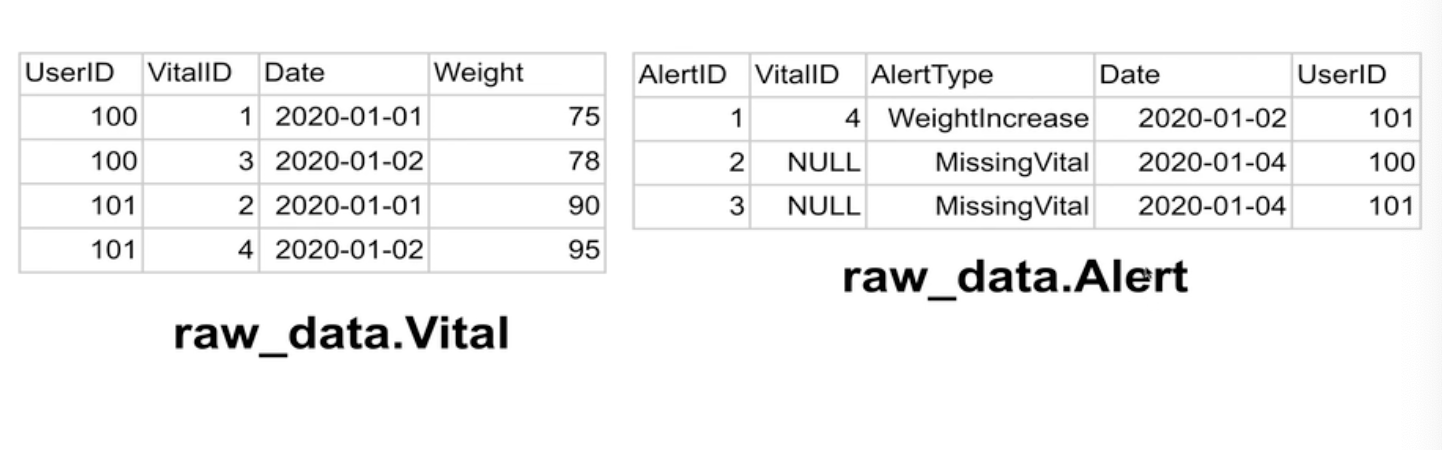

## LEFT JOIN 
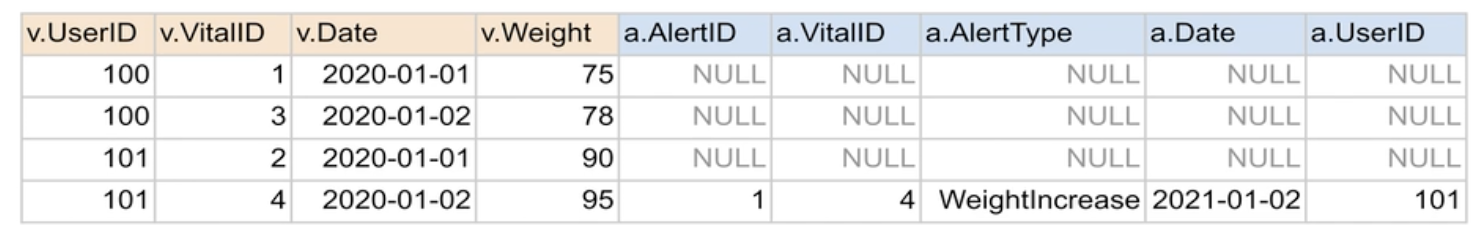
- 왼쪽 테이블의 모든 레코드를 리턴함.

```sql
SELECT * FROM raw _data. Vital v
LEFT JOIN raw_data. Alert a ON v.vitallD = a.vitalID;
```

## FULL JOU 

1. 왼쪽 테이블과 오른쪽 테이블의 모든 레코드들을 리턴함
2. 매칭되는 경우에만 양쪽 테이블들의 모든 필드들이 채워진 상태로 리턴됨
```sql
SELECT * FROM raw_data. Vital v
FULL JOIN raw_data.Alert a ON v. vitalID = a.vitalID;
```

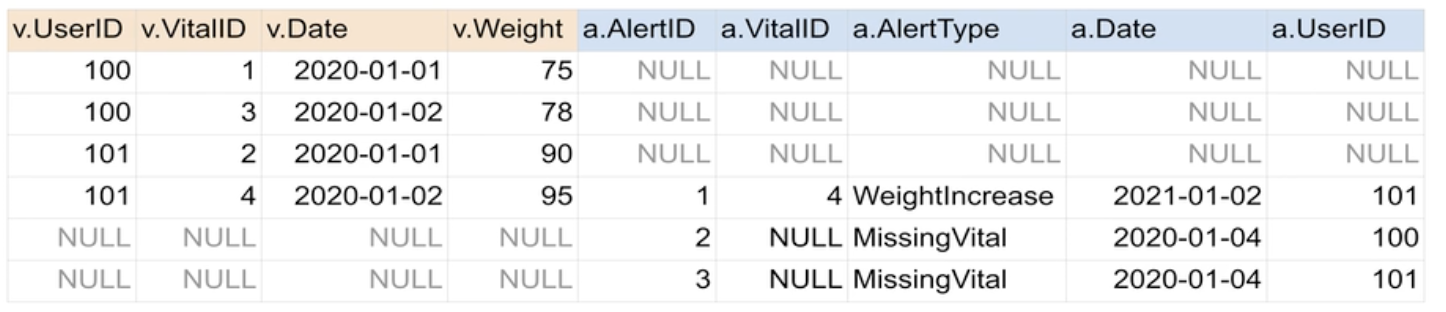

## CROSS JOIN
1. 왼쪽 테이블과 오른쪽 테이블의 모든 레코드들의 조합을 리턴함
```sql
SELECT * FROM raw _data.Vital v CROSS JOIN raw_data.Alert a;
```
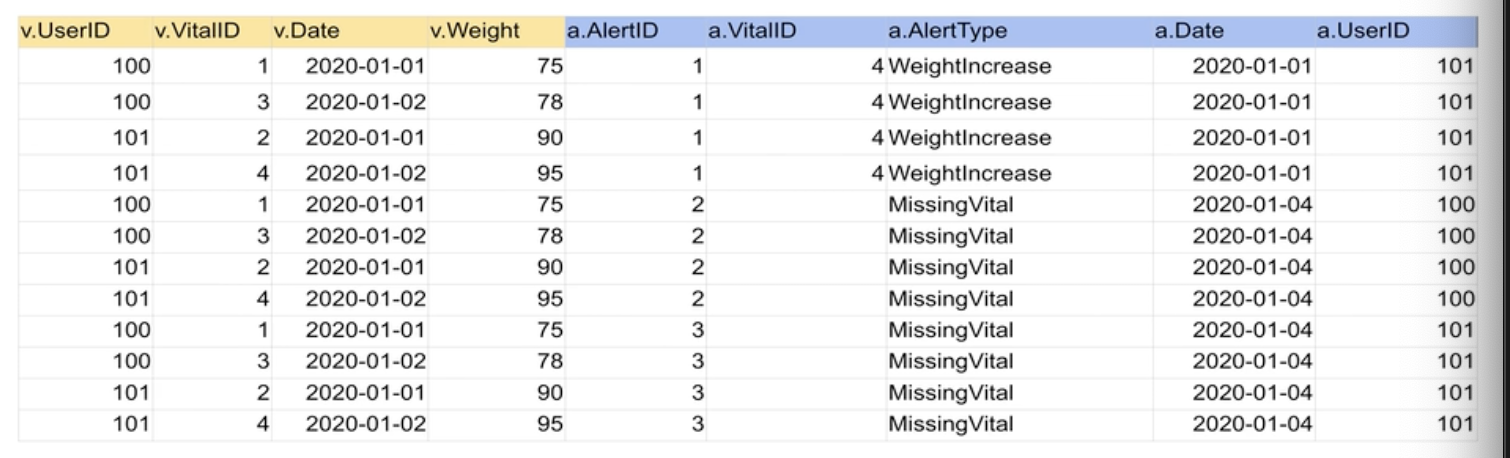

##  SELF JOIN
1. 동일한 테이블을 alias를 달리해서 자기 자신과 조인함

```sql
SELECT * FROM raw_data.  Vital v1
JOIN raw_data. Vital v2 ON v1. vitalID = v2.vitalID;
```
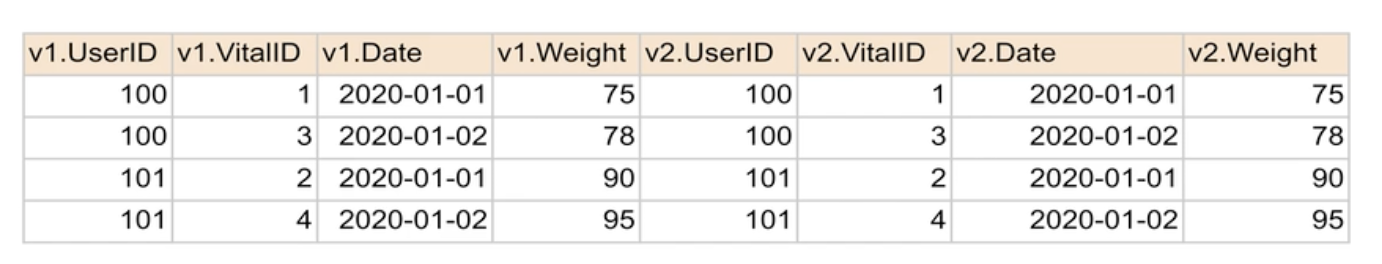


# BOOLEAN 타입 처리
- True or False
- 다음 2개는 동일한 표현
    - flag = True
    - flag is 'True
- 다음 2개는 동일한 표현인가?
    - flag is True
    - flag is not False
- 당연히 `NULL`과 `False`는 다른 표현

```sql
SELECT
    COUNT(CASE WHEN flag = True THEN 1 END) true_ont1,
    COUNT(CASE WHEN flag is True THEN 1 END) true_cnt2,
    COUNT (CASE WHEN flag is not False THEN 1 END) not false_ont
FROM raw_data.boolean_test;
```

# NULL 비교
- NULL 비교는 항상 IS 혹은 IS NOT으로 수행
- NULL 비교를 = 혹은 != 혹은 <>으로 수행하면 잘못된 결과가 나옴
```sql
SELECT COUNT(1)
FROM raw _data.boolean_test
WHERE flag is NULL;
```
```sql
SELECT COUNT(1)
FROM raw_data.boolean_test
WHERE flag = NULL;
```

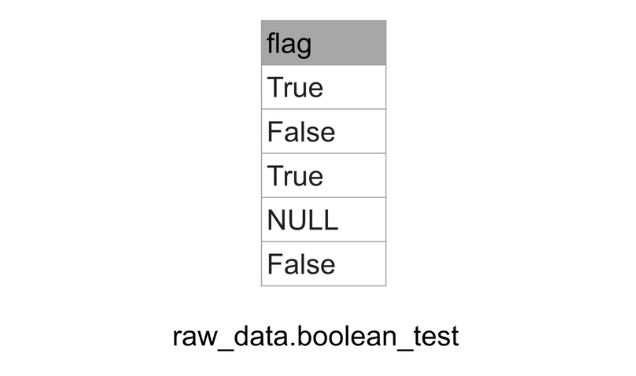

# 숙제풀이 (1)
- 채널별 월 매출액 테이블 만들기 -먼저 유일한 사용자 수부터 세보자
```sql
SELECT LEFT(ts, 7) "month",
usc.channel,
COUNT(DISTINCT userid) uniqueUsers
FROM raw_data.user_session_channel usc
JOIN raw_data.session_timestamp t ON t.sessionid = usc.sessionid
GROUP BY 1, 2
ORDER BY 1, 2;
```

# 숙제풀이 (2)
- 채널별 월 매출액 테이블 만들기 - 이제 session_transaction 테이블을 추가해보자
```sql
SELECT LEFT (ts, 7) "month",
usc.channel,
COUNT(DISTINCT userid) uniqueUsers
FROM raw_data.user_session_channel usc
JOIN raw_data.session_timestamp t ON t.sessionid = usc.sessionid
LEFT JOIN raw _data.session_transaction st ON st.sessionid = usc. sessionid
GROUP BY 1, 2
ORDER BY 1, 2;
```

# 숙제풀이 (3)
- 채널별 월 매출액 테이블 만들기 - 이제 paidUsers를 추가해보자
```sql
SELECT LEFT(ts, 7) "month",
usc.channel,
COUNT(DISTINCT userid) uniqueUsers,
COUNT(DISTINCT CASE WHEN amount > 0 THEN usc.userid END) paidUsers,
FROM raw_data.user_session_channel usc
JOIN raw_data.session_timestamp t ON t.sessionid = usc.sessionid
LEFT JOIN raw_data.session_transaction st ON st.sessionid = usc.sessionid
GROUP BY 1, 2
ORDER BY 1, 2;
```

# 숙제풀이 (4)
- 채널별 월 매출액 테이블 만들기- 이제 conversionRate을 추가해보자
>첫 번째 시도:
- paidUsers/uniqueUsers AS conversionRate
> 두 번째 시도:
- paidUsers::float/uniquel¿sers AS conversionRate
> 세 번째 시도:
- ROUND(paidUsers*100.0/uniqueUsers, 2) AS conversionRate
> 네 번째 시도:
- ROUND(paidUsers*100.0/NULLIF(uniqueUsers, 0), 2) AS conversionRate
- NULLIF(uniqueUsers, 0), 2) : uniqueUsers가 0인 경우 -> NULL 

## NULLIF
- paidUsers/uniqueUsers
    - 0으로 나누는 경우 divide by 0 에러 발생
    - 이를 어떻게 방지할까? NULLIF를 사용하여 0을 NULL로 변경
        - paidUsers/NULLIF (uniqueUsers, 0)
        - 다시 한번 사칙연산에 NULL이 들어가면 결과도 NULL이 됨을 기억!

# 숙제풀이 (5)
- 채널별 월 매출액 테이블 만들기
```sql
SELECT LEFT(ts, 7) "month", - "year month" channel,
    COUNT (DISTINCT usc.userid) uniqueUsers,
    COUNT(DISTINCT CASE WHEN amount > 0 THEN usc.userid END) paidUsers, ROUND(paidUsers:float*100/NULLIF(uniqueUsers, 0),2) conversionRate,
    SUM(amount) grossRevenue,
    SUM(CASE WHEN refunded is False THEN amount END) netRevenue
FROM raw_data.user _session_channel usc
LEFT JOIN raw
_data.session_ timestamp t ON t.sessionid = usc.sessionid
GROUP BY 1, data session transaction ON st sessionid = usc. sessioni
ORDER BY 1, 2;
```

## COALESCE
- NULL 값을 다른 값으로 바꿔주는 함수
    - 즉 NULL대신에 다른 백업값을 리턴해주는 함수

- `COALESCE(exp1, exp2, exp3, ....)``
    - exp1부터 인자를 하나씩 살펴서 NULL이 아닌 값이 나오면 그걸 리턴 0
    - 끝까지 갔는데도 모두 NULL이면 최종적으로 NULL을 리턴

```sql
SELECT value,
COALESCE(value, 0) -- value가 NULL이면 0을 리턴
FROM raw_data.count_test;
```

## 공백 혹은 예약키워드를 필드 이름으로 사용하려면?
>~ 로 둘러싸서 사용
```sql
CREATE TABLE keeyong.test (
    group int primary key,
    'mailing address' varchar(32)
);
```

# 숙제풀이 (6)
- 채널별 월 매출액 테이블 만들기
```sql
DROP TABLE IF EXISTS adhoc.keeyong_monthly_channel summary;
CREATE TABLE adhoc.keeyong_monthly_channel_summary AS
SELECT LEFT(ts, 7) "month",
channel,
COUNT(DISTINCT usc.userid) uniqueUsers,
COUNT(DISTINCT CASE WHEN amount > 0 THEN usc.userid END) paidUsers, ROUND(paidUsers::float*100/NULLIF(uniqueUsers, 0),2) conversionRate,
SUM(amount) grossRevenue,
SUM(CASE WHEN refunded is False THEN amount END) netRevenue
FROM raw_data.user _session _channel usc
LEFT JOIN raw_data.session_timestamp t ON t.sessionid = usc.sessionid
LEFT JOIN raw_data.session_transaction st ON st.sessionid = usc.sessionid
GROUP BY 1, 2;
``` 

# 두번째 숙제

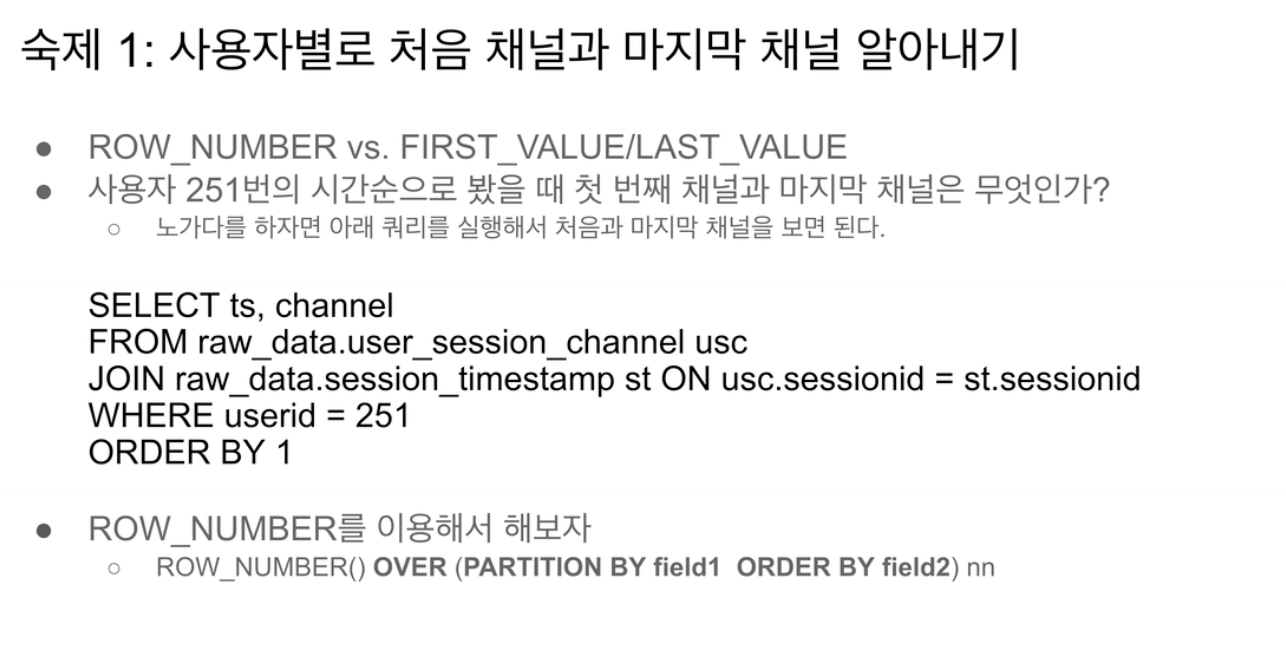

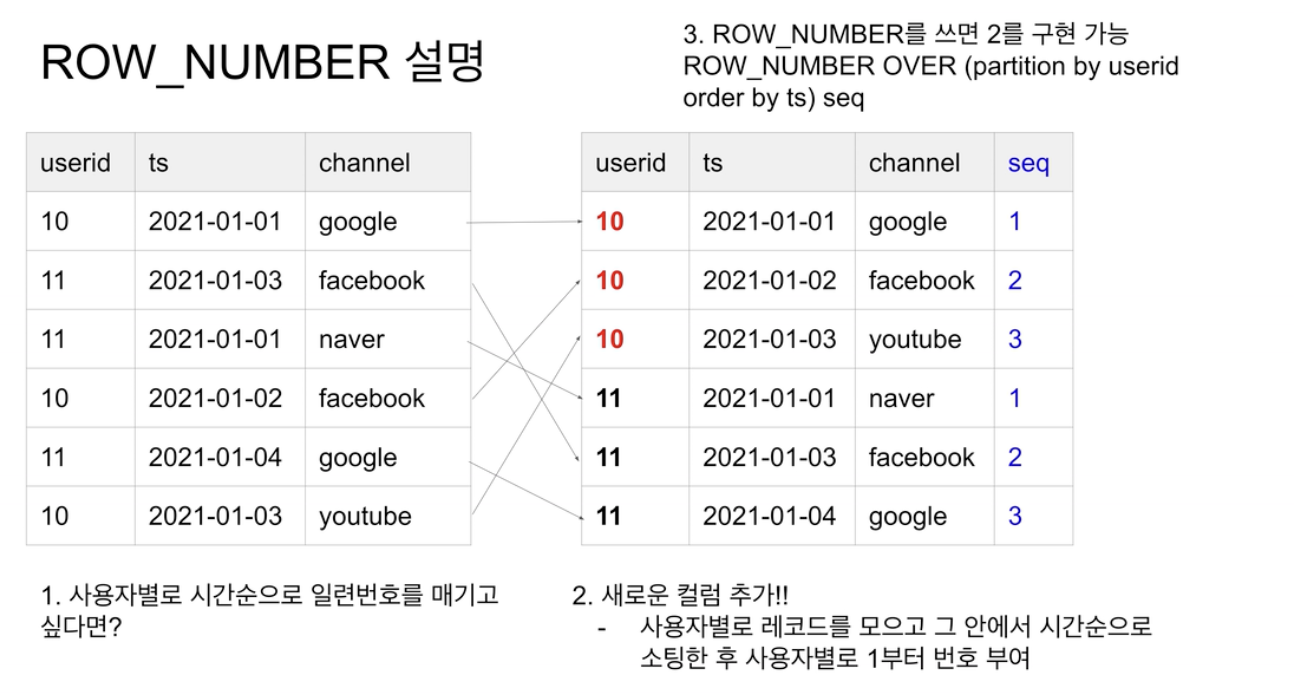
- 1. CTE : 임시 테이블 생성
```sql
WITH first AS (
SELECT userid, ts, channel, ROW _NUMBER() OVER(PARTITION BY userid ORDER BY ts) seq
FROM raw _data.user_session_channel usc
JOIN raw_data.session_timestamp st ON usc.sessionid = st. sessionid
), last AS (
SELECT userid, ts, channel, ROW _NUMBER( OVER(PARTITION BY userid ORDER BY Is DESC) seq
FROM raw_data.user_session_channel usc
JOIN raw_data.session_timestamp st ON usc.sessionid = st.sessionid
)
SELECT first.userid AS userid, firstchannel AS first channel, last channel AS last channel
FROM first
JOIN last ON first.userid = last.userid and last.seq = 1
WHERE first.seq = 1;
```

- 2. JOIN 방식
```sql
SELECT first.userid AS userid, first.channel AS first_channel, last.channel AS last_channel
FROM (
SELECT userid, ts, channel, ROW_NUMBER() OVER(PARTITION BY userid ORDER BY ts) seq
FROM raw_data.user_session_channel usc
JOIN raw_data.session_timestamp st ON usc. sessionid = st.sessionid
) first
JOIN (
SELECT userid, ts, channel, ROW _NUMBER() OVER(PARTITION BY userid ORDER BY ts DESC) seq
FROM raw_data.user _session_channel usc
JOIN raw _data.session timestamp st ON usc. sessionid = st. sessionid
) last ON first.userid = last.userid and last.seq = 1
WHERE first.seq = 1;
```

- 3. GROUP BY 방식
```sql
SELECT userid,
MAX(CASE WHEN r1 = 1 THEN channel END) first _touch,
MAX(CASE WHEN rn2 = 1 THEN channel END) last_touch
FROM (
SELECT userid, channel,
(ROW _NUMBER() OVER (PARTITION BY usc.userid ORDER BY st.ts asc)) AS rn1, (ROW _NUMBER() OVER (PARTITION BY usc.userid ORDER BY st.ts desc)) AS rn2
FROM raw_data.user_session_channel usc
JOIN raw_data.session_timestamp st ON usc.sessionid = st.sessionid
)
GROUP BY 1;
```

- 4. FIRST_VALUE / LAST_VALUE
```sql
SELECT DISTINCT
A.userid,
FIRST_VALUE(A. channel) over(partition by A.userid order by B.ts rows between unbounded preceding and unbounded following) AS First_Channel, LAST _VALUE(A.channel) over(partition by A.userid order by B.ts rows between unbounded preceding and unbounded following) AS Last _Channel
FROM raw_data.user_session_channel A
LEFT JOIN raw _data.session _limestamp B ON A.sessionid = B.sessionid;
```

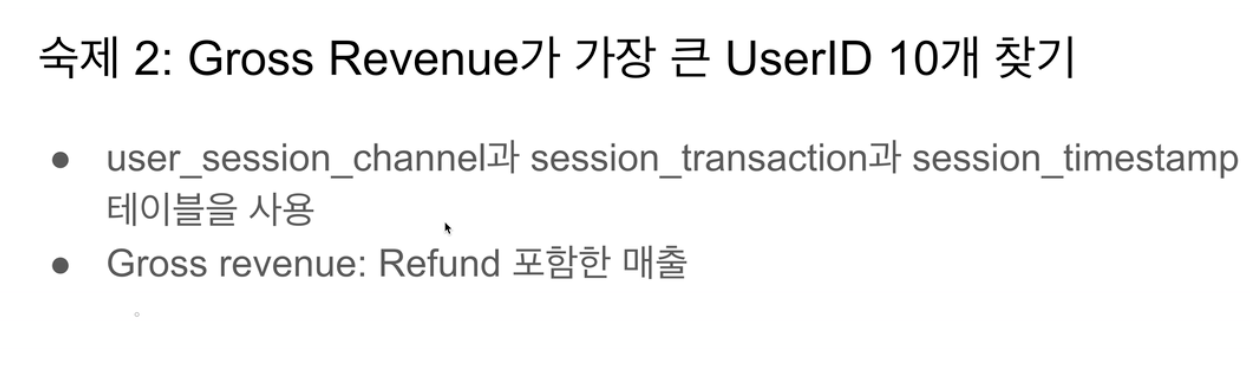
- 1. GROUP BY
```sql
SELECT
userlD,
SUM(amount)
FROM raw_data.session_transaction st
LEFT, JOIN raw_data.user_session_channel usc ON st.sessionid = usc.sessionid
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10;
```

- 2. SUM OVER
```sql
SELECT DISTINCT usc.userid,
SUM(amount) OVER(PARTITION BY usc.userid)
FROM raw_data.user_session_channel AS usc
JOIN raw _data.session _transaction AS revenue ON revenue.sessionid = usc.sessionid
ORDER BY 2 DESC
LIMIT 10;
```

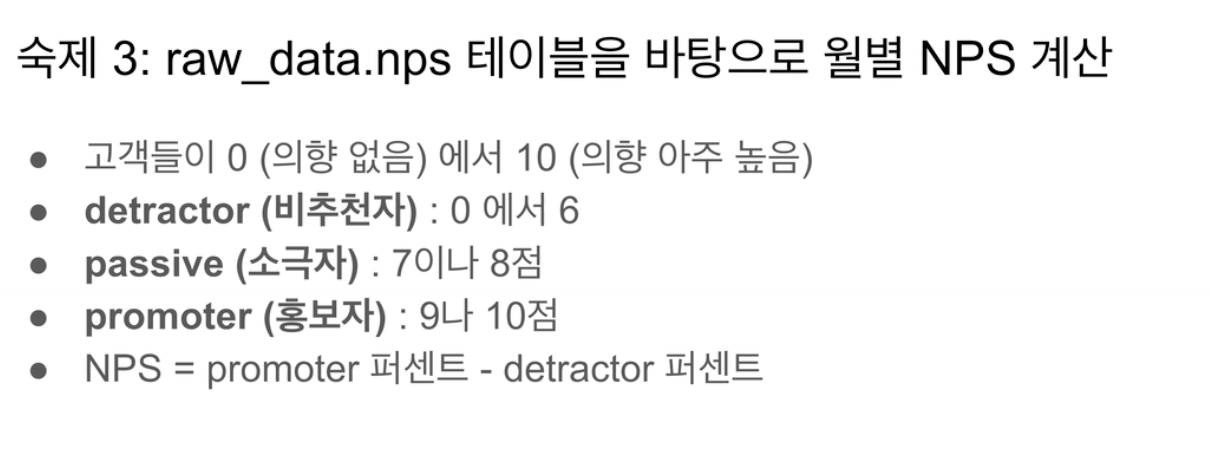

- 1.
```sql
SELECT month,
ROUND((promoters-detractors)::float/total_
(count*100, 2) AS overall_nps
FROM (
SELECT LEFT(created, 7) AS month,
COUNT(CASE WHEN score >= 9 THEN 1 END) AS promoters, COUNT(CASE WHEN score <= 6 THEN 1 END) AS detractors,
COUNT(CASE WHEN score > 6 AND score < 9 THEN 1 END) As passives,
COUNT(1) AS total_count
FROM raw_data.nps
GROUP BY 1
ORDER BY 1
);
```

- 2. 
```sql
SELECT LEFT(created, 7) AS month,
ROUND(SUM(CASE
    WHEN score >= 9 THEN 1
    WHEN score <= 6 THEN -1 END):float*100/COUNT(1), 2)
FROM raw_data.nps
GROUP BY 1
ORDER BY 1;
```

# Transaction

- Atomic하게 실행되어야 하는 **SQL들을 묶어서** 하나의 작업처럼 처리하는 방법
    - 이는 DDL이나 DML 중 레코드를 수정/추가/삭제한 것에만 의미가 있음.
    - SELECT에는 트랜잭션을 사용할 이유가 없음
    - **BEGIN과 END** 혹은 **BEGIN과 COMMIT** 사이에 해당 SQL들을 사용
    - ROLLBACK

- 은행 계좌 이체가 아주 좋은 예

    - 계좌 이체: 인출과 입금의 두 과정으로 이뤄짐
    - 만일 인출은 성공했는데 입금이 실패한다면?
    - 이 두 과정은 동시에 성공하던지 실패해야함 -> Atomic하다는 의미        
    - 이런 과정들을 트랜잭션으로 묶어주어야함
    - 조회만 한다면 이는 트랜잭션으로 묶일 이유가 없음


## BEGIN;

```text
BEGIN;
A의 계좌로부터 인출;
B의 계좌로 입금;
END;
```
- END와 COMMIT은 동일
- 만일 BEGIN 전의 상태로 돌아가고 싶다면 ROLLBACK 실행

## transaction 커밋모드 : autocommit
- autocomnit = True
    - 모든 레코드 수정/삭제/추가 작업이 기본적으로 바로 데이터베이스에 쓰여짐. ㅂ]이를 커밋(Commit)된다고 함.
    - 만일 특정 작업을 트랜잭션으로 묶고 싶다면 BEGIN과 END(COMMIT)/ROLLBACK으로 처리
- autocommit = False
    - 모든 레코드 수정/삭제/추가 작업이 COMMIT 호출될 때까지 커밋되지 않음                                      

## 트랜잭션 방식
- Google Colab의 트랜잭션
    - 기본적으로 모든 SQL statement가 바로 커밋됨 (autocommit=True)
    - 이를 바꾸고 싶다면 BEGIN;END; 혹은 BEGIN;COMMIT을 사용 (혹은 ROLLBACK;)
- psycopg2의 트랜잭션
    - autocommit이라는 파라미터로 조절가능
    - autocommit=True가 되면 기본적으로 PostgreSQL의 커밋 모드와 동일
    - autocommit=False가 되면 커넥션 객체의 .commit()과 rollback()함수로 트랜잭션 조절 가능
    - 무엇을 사용할지는 개인 취향

## DELETE FROM vs. TRUNCATE
- DELETE FROM table_name (not DELETE * FROM)
0 테이블에서 모든 레코드를 삭제 VS. DROP TABLE table_name
- WHERE 사용해 특정 레코드만 삭제 가능:
- DELETE FROM raw _data.user _session _channel WHERE channel = 'Google'
- TRUNCATE table_name도 테이블에서 모든 레코드를 삭제
DELETE FROM은 속도가 느림
TRUNCATE이 전체 테이블의 내용 삭제시에는 여러모로 유리 하지만 두가지 단점이 존재
- TRUNCATE는 WHERE을 지원하지 않음
- TRUNCATE는 Transaction을 지원하지 않음
